<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/02_tensorflow_NN_clasiffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

In [3]:
n = 1000
X, y = make_circles(n, noise = 0.03, random_state = 42)

In [4]:
X.shape

(1000, 2)

In [5]:
X[0]

array([0.75424625, 0.23148074])

In [6]:
y.shape

(1000,)

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [16]:
X[:,0].shape

(1000,)

In [17]:
X[:1]

array([[0.75424625, 0.23148074]])

In [9]:
import matplotlib.pyplot as plt

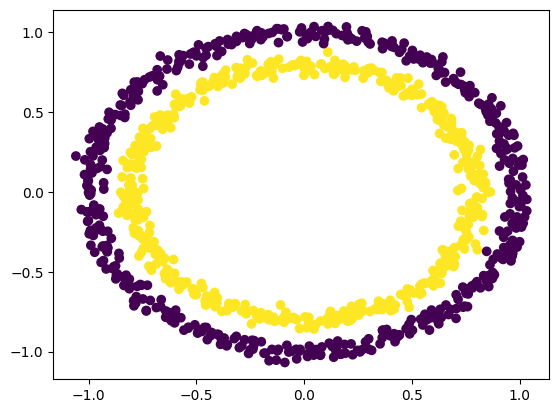

In [18]:
plt.scatter(x = X[:,0], y= X[:,1], c = y)
plt.show()

In [19]:
X.shape, y.shape

((1000, 2), (1000,))

In [20]:
len(X), len(y)

(1000, 1000)

In [28]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential

In [47]:
model = Sequential(
    (
        Input(shape =(2)),
        Dense(10, activation = 'relu'),
        Dense(50, activation = 'relu'),
        Dense(50, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    )
)
model.compile(optimizer = "Adam", loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 dense_17 (Dense)            (None, 50)                550       
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,181
Trainable params: 3,181
Non-trainable params: 0
_________________________________________________________________


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
ES = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    patience = 2, 
    restore_best_weights= True)

In [51]:
history = model.fit(x_train, y_train, epochs = 100, callbacks=[ES], verbose = 0)
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9933


[0.16223497688770294, 0.9933333396911621]

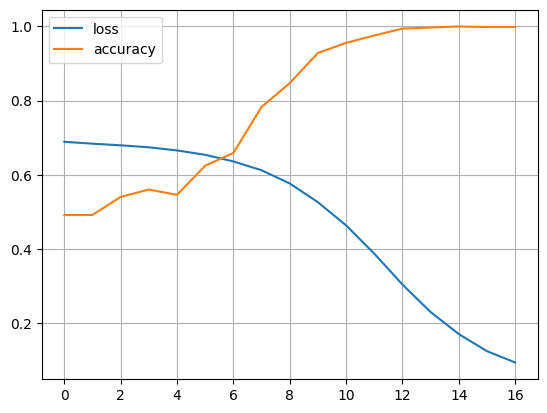

In [53]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [108]:
import numpy as np
def plot_boundaries(X, y, model):
  x_min = X[:,0].min()- 0.1
  x_max = X[:,0].max()+ 0.1
  y_min = X[:,1].min() - 0.1
  y_max = X[:,1].max()+0.1

  x_points = np.linspace(x_min, x_max, 100)
  y_points = np.linspace(y_min, y_max, 100)
  xx, yy = np.meshgrid(x_points, y_points)

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  if model.output_shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, alpha=0.7)
  plt.scatter(X[:, 0], X[:,1],c = y)
  plt.show()

313/313 [==============================] - 0s 1ms/step


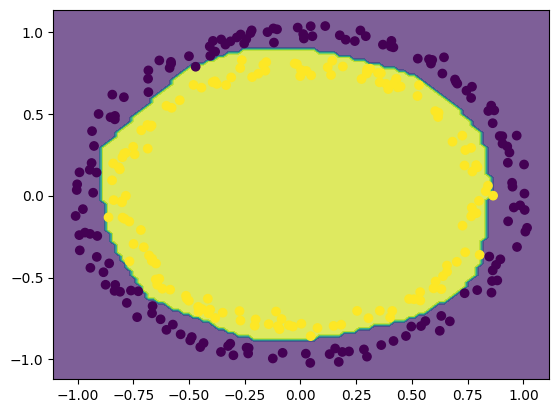

In [109]:
plot_boundaries(x_test, y_test, model)

In [107]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 0.9933


[0.16223497688770294, 0.9933333396911621]

313/313 [==============================] - 0s 1ms/step


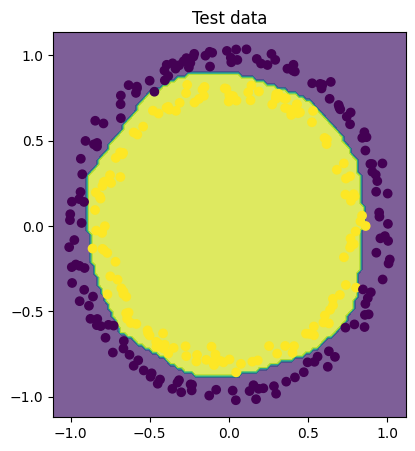

313/313 [==============================] - 0s 1ms/step


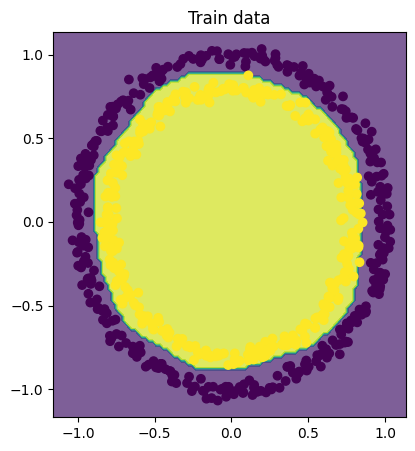

In [119]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Test data')
plot_boundaries(x_test, y_test, model)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,2)
plt.title('Train data')
plot_boundaries(x_train, y_train, model)
plt.show()